In [1]:
import yaml
import numpy as np

import descartes as des
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append("../")

from electronfactors.ellipse.equivalent import equivalent_ellipse
from electronfactors.ellipse.utilities import shapely_cutout
from electronfactors.visuals.shape_display import display_shapely, display_equivalent_ellipse
from electronfactors.visuals.utilities import make_ellipse

In [2]:
def reg_m(y, x):
    ones = np.ones(len(x[0]))
    X = sm.add_constant(np.column_stack((x[0], ones)))
    for ele in x[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(y, X).fit()
    return results

In [3]:
from matplotlib import rc
rc('font',**{'family':'serif',
             'size':'16'})
rc('text', usetex=True)
rc('legend', fontsize=16, scatterpoints=1, fancybox=True)

In [4]:
with open("model_cache/12MeV_10app_100ssd.yml", 'r') as file:
    cutout_data = yaml.load(file)

In [5]:
XCoords = np.array(cutout_data['P22']['XCoords'])
YCoords = np.array(cutout_data['P22']['YCoords'])
width = np.array(cutout_data['P22']['width'])
length = np.array(cutout_data['P22']['length'])
poi = np.array(cutout_data['P22']['poi'])

In [12]:
poi

array([ 0.05, -0.53])

In [27]:
length

array(10.25)

In [16]:
[poi[0]-width/2, poi[0]+width/2]

[-3.4000000000000004, 3.5]

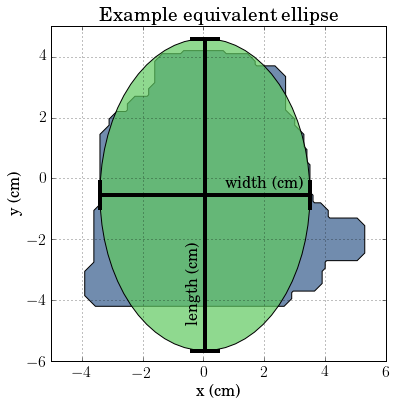

In [58]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

cutout = shapely_cutout(XCoords, YCoords)
ellipse = make_ellipse(ax=ax, poi=poi, width=width, length=length)

cutout_patch = des.PolygonPatch(
    cutout, fc=[ 0.21239477,  0.35968273,  0.55171011, 0.7], 
    lw=1)
ax.add_patch(cutout_patch)

ellipse_patch = des.PolygonPatch(
    ellipse, fc=[ 0.37777892,  0.79178146,  0.3779385, 0.7 ], 
    lw=1)
ax.add_patch(ellipse_patch)

plt.plot(
    [poi[0]-width/2, poi[0]+width/2],
    [poi[1]]*2,
    lw=4, color='black', marker='|', mew=4, ms=30)

plt.plot(
    [poi[0]]*2,
    [poi[1]-length/2, poi[1]+length/2],
    lw=4, color='black', marker='_', mew=4, ms=30)

plt.text(0.7, -0.35, "width (cm)")
plt.text(-0.6, -2.5, "length (cm)", rotation='vertical')

plt.grid(True)

plt.xlim([-5, 6])
plt.ylim([-6, 5])

plt.title(r'Example equivalent ellipse')
plt.xlabel(r'x (cm)')
plt.ylabel(r'y (cm)')

In [7]:
custom_data = dict()

key = 'Concave'
custom_data[key] = dict()
custom_data[key]['XCoords'] = np.array([-3.5, -3.5, 0, 3.5, 3.5, 0.5, 0.5, 3.5, 3.5, 0, -3.5]) / 0.95
custom_data[key]['YCoords'] = np.array([0, 4, 5, 4.5, 2, 1.5, -1.5, -2, -4.5, -5, -4]) / 0.95

labels = [key for key in custom_data]
ellipse_raw = [equivalent_ellipse(**custom_data[key]) for key in labels]

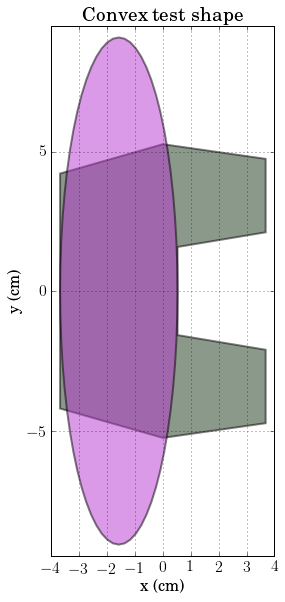

In [8]:
concave_cutout = shapely_cutout(custom_data[key]['XCoords'], custom_data[key]['YCoords'])
concave_ellipse = make_ellipse(**ellipse_raw[0])

xlims = np.array([-4, 4])
ylims = np.array([-9.5, 9.5])
scale = 0.5

fig = plt.figure(figsize=(scale * xlims.ptp(), scale * ylims.ptp()))
ax = fig.add_subplot(111)

cutout_patch = des.PolygonPatch(concave_cutout, fc=np.random.uniform(size=3), alpha=0.5, lw=2)
ax.add_patch(cutout_patch)

ellipse_patch = des.PolygonPatch(concave_ellipse, fc=np.random.uniform(size=3), alpha=0.5, lw=2)
ax.add_patch(ellipse_patch)

plt.grid(True)

plt.xlim(xlims)
plt.ylim(ylims)

plt.title(r'Convex test shape')
plt.xlabel(r'x (cm)')
plt.ylabel(r'y (cm)')